# Import Library and Load Data for IT Industry

In [ ]:
%pip install prophet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/IT_Industry_Monthly_Data_New_Target.xlsx')
df = df.sort_values(by=['ds'])
df.head()

,ds,y,inventory,new_orders,u_lagged9,u
0,2001-10-01,-0.045700,-0.244538,-0.135942,0.344889,1.288541
1,2001-11-01,-1.024950,-0.220756,0.095337,-0.984319,0.482126
2,2001-12-01,-0.933126,-0.417302,0.122336,24.622835,7.357577
3,2002-01-01,-0.991568,0.030870,-0.755937,-0.273865,-0.391417
4,2002-02-01,0.246085,-0.178718,1.251545,3.576893,1.262887


In [ ]:
target = pd.DataFrame()
target['ds'] = pd.to_datetime(df['ds'])
target['y'] = df['y']
target.head()

,ds,y
0,2001-10-01,-0.045700
1,2001-11-01,-1.024950
2,2001-12-01,-0.933126
3,2002-01-01,-0.991568
4,2002-02-01,0.246085


In [ ]:
target['inventory']=df['inventory']
target['new_orders']=df['new_orders']
target['u_lagged9']=df['u_lagged9']
target.head()

,ds,y,inventory,new_orders,u_lagged9
0,2001-10-01,-0.045700,-0.244538,-0.135942,0.344889
1,2001-11-01,-1.024950,-0.220756,0.095337,-0.984319
2,2001-12-01,-0.933126,-0.417302,0.122336,24.622835
3,2002-01-01,-0.991568,0.030870,-0.755937,-0.273865
4,2002-02-01,0.246085,-0.178718,1.251545,3.576893


Text(0.5, 1.0, 'Annualized EPS Growth Rate Minus 10-year Treasury Yield For IT Industry')

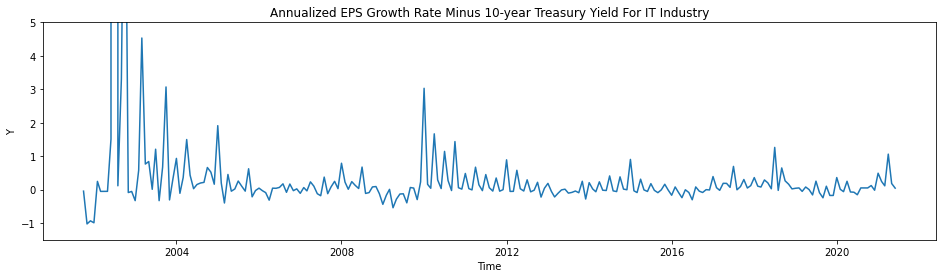

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
plt.plot(target.ds,target.y)
ax.set_xlabel('Time')
ax.set_ylabel('Y')
plt.ylim(-1.5,5)
ax.set_title('Annualized EPS Growth Rate Minus 10-year Treasury Yield For IT Industry')
#Platform because we're filling in all months of a quarter with the same quarterly measured data

# Baseline Facebook Prophet Model & Model with Regressors

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(target)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
597,2022-05-28
598,2022-05-29
599,2022-05-30
600,2022-05-31
601,2022-06-01


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
597,2022-05-28,-0.078328,-23.481881,20.630975
598,2022-05-29,-0.058355,-17.721527,16.003852
599,2022-05-30,-0.038248,-11.691873,10.527817
600,2022-05-31,-0.018663,-5.776373,5.089615
601,2022-06-01,-0.000284,-1.410446,1.485624


In [ ]:
m2 = Prophet(seasonality_mode='multiplicative')
m2.add_regressor('inventory')
m2.add_regressor('new_orders')
m2.add_regressor('u_lagged9')
m2.fit(target)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Define a Function for Model Running

In [ ]:
def generate_model_result(df=df, pred_month=1, horizon='30 days',filename='/content/drive/MyDrive/Colab Notebooks/KPMG summer project/one_month_prediction_EBITA.csv'):
  df=df
  target=pd.DataFrame()
  target['ds']=pd.to_datetime(df['ds'])
  target['y']=df['y']
  target['inventory']=df['inventory']
  target['new_orders']=df['new_orders']
  target['u_lagged9']=df['u_lagged9']
  target.index=range(len(target))
  target=target.drop(list(range(0, pred_month)))
  target.index=range(len(target))
  m2=Prophet(seasonality_mode='multiplicative')
  m2.add_regressor('inventory')
  m2.add_regressor('new_orders')
  m2.add_regressor('u_lagged9')
  m2.fit(target)
  df_cv=cross_validation(m2, initial='2190 days', period='30 days', horizon=horizon)
  df_cv.to_csv(filename)
  return 0

In [ ]:
one_month = [df,1,'31 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/one_month_prediction_EBITA.csv']
two_month = [df,2,'59 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/two_month_prediction_EBITA.csv']
three_month = [df,3,'90 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/three_month_prediction_EBITA.csv']
four_month = [df,4,'120 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/four_month_prediction_EBITA.csv']
five_month = [df,5,'151 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/five_month_prediction_EBITA.csv']
six_month = [df,6,'181 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/six_month_prediction_EBITA.csv']
seven_month = [df,7,'212 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/seven_month_prediction_EBITA.csv']
eight_month = [df,8,'243 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/eight_month_prediction_EBITA.csv']
nine_month = [df,9,'273 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/nine_month_prediction_EBITA.csv']
ten_month = [df,10,'304 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/ten_month_prediction_EBITA.csv']
eleven_month = [df,11,'334 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/eleven_month_prediction_EBITA.csv']
twelve_month = [df,12,'365 days','/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/twelve_month_prediction_EBITA.csv']

In [ ]:
for i in [one_month,two_month,three_month,four_month]:
    generate_model_result(*i)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 165 forecasts with cutoffs between 2007-11-11 00:00:00 and 2021-05-01 00:00:00


  0%|          | 0/165 [00:00<?, ?it/s]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 163 forecasts with cutoffs between 2007-12-13 00:00:00 and 2021-04-03 00:00:00


  0%|          | 0/163 [00:00<?, ?it/s]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 161 forecasts with cutoffs between 2008-01-11 00:00:00 and 2021-03-03 00:00:00


  0%|          | 0/161 [00:00<?, ?it/s]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 159 forecasts with cutoffs between 2008-02-10 00:00:00 and 2021-02-01 00:00:00


  0%|          | 0/159 [00:00<?, ?it/s]

In [ ]:
for i in [five_month,six_month,seven_month,eight_month,nine_month]:
    generate_model_result(*i)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 157 forecasts with cutoffs between 2008-03-10 00:00:00 and 2021-01-01 00:00:00


  0%|          | 0/157 [00:00<?, ?it/s]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 155 forecasts with cutoffs between 2008-04-09 00:00:00 and 2020-12-02 00:00:00


  0%|          | 0/155 [00:00<?, ?it/s]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 153 forecasts with cutoffs between 2008-05-08 00:00:00 and 2020-11-01 00:00:00


  0%|          | 0/153 [00:00<?, ?it/s]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 151 forecasts with cutoffs between 2008-06-06 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/151 [00:00<?, ?it/s]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 149 forecasts with cutoffs between 2008-07-06 00:00:00 and 2020-09-01 00:00:00


  0%|          | 0/149 [00:00<?, ?it/s]

# Plot the Prediction Results

In [ ]:
m1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/one_month_prediction_EBITA.csv')
m2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/two_month_prediction_EBITA.csv')
m3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/three_month_prediction_EBITA.csv')
m4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/four_month_prediction_EBITA.csv')
m5=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/five_month_prediction_EBITA.csv')
m6=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/six_month_prediction_EBITA.csv')
m7=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/seven_month_prediction_EBITA.csv')
m8=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/eight_month_prediction_EBITA.csv')
m9=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/nine_month_prediction_EBITA.csv')

In [ ]:
def updatedf(df,filename):
    df=df[['ds','yhat','y']]
    df.drop_duplicates(subset='ds',inplace=True)
    df.to_csv(filename)
    return 0

In [ ]:
updatedf(m1,'/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/one_month_prediction_EBITA.csv')
updatedf(m2,'/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/two_month_prediction_EBITA.csv')
updatedf(m3,'/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/three_month_prediction_EBITA.csv')
updatedf(m4,'/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/four_month_prediction_EBITA.csv')
updatedf(m5,'/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/five_month_prediction_EBITA.csv')
updatedf(m6,'/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/six_month_prediction_EBITA.csv')
updatedf(m7,'/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/seven_month_prediction_EBITA.csv')
updatedf(m8,'/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/eight_month_prediction_EBITA.csv')
updatedf(m9,'/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/nine_month_prediction_EBITA.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

In [ ]:
m1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/one_month_prediction_EBITA.csv')
m2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/two_month_prediction_EBITA.csv')
m3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/three_month_prediction_EBITA.csv')
m4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/four_month_prediction_EBITA.csv')
m5=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/five_month_prediction_EBITA.csv')
m6=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/six_month_prediction_EBITA.csv')
m7=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/seven_month_prediction_EBITA.csv')
m8=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/eight_month_prediction_EBITA.csv')
m9=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/ITprediction/nine_month_prediction_EBITA.csv')

In [ ]:
m1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/Final Short-term Model/Results/one_month_prediction.csv')
m2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/Final Short-term Model/Results/two_month_prediction.csv')
m3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/Final Short-term Model/Results/three_month_prediction.csv')
m4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/Final Short-term Model/Results/four_month_prediction.csv')
m5=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/Final Short-term Model/Results/five_month_prediction.csv')
m6=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/Final Short-term Model/Results/six_month_prediction.csv')
m7=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/Final Short-term Model/Results/seven_month_prediction.csv')
m8=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/Final Short-term Model/Results/eight_month_prediction.csv')
m9=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KPMG summer project/Final Short-term Model/Results/nine_month_prediction.csv')

In [ ]:
def plot_the_prediction(df,title):
    df['ds']=pd.to_datetime(df['ds'])
    df = df[df[df.ds=='2013-02-01'].index[0]:df[df.ds=='2020-12-01'].index[0]+1]
    df.index=df.ds
    fig,ax = plt.subplots(1,1,figsize=(10,6))
    plt.title(title, fontsize=18)
    plt.ylabel('EBITA', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.ylim(-2,5)
    plt.plot(df.ds, df.yhat,color='blue',label='EBITA Prediction')
    plt.plot(df.ds, df.y,color='grey', label='EBITA')
    return 0

In [ ]:
def plot_the_residual(df,title):
    df['ds']=pd.to_datetime(df['ds'])
    df = df[df[df.ds=='2013-02-01'].index[0]:df[df.ds=='2020-12-01'].index[0]+1]
    df.index=df.ds
    df.residual=df.yhat-df.y
    fig,ax = plt.subplots(1,1,figsize=(10,6))
    plt.title(title, fontsize=18)
    plt.ylabel('Residual', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    ax.scatter(df.index,df.residual,color='blue',label='EPS Prediction')
    ax.hlines(xmin=df.index[0],xmax=df.index[-1],y=0,color = 'red', linestyles='dashed',)
    return 0

0

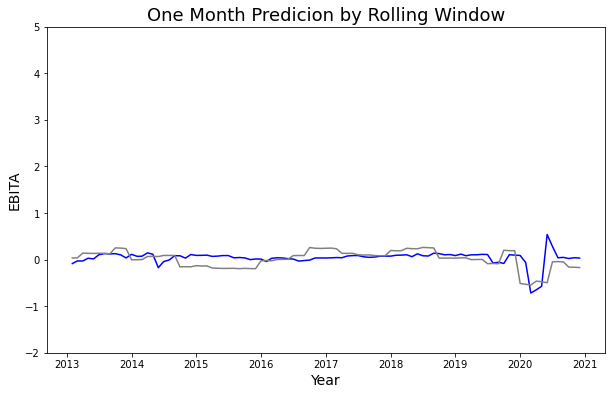

In [ ]:
plot_the_prediction(m1,'One Month Predicion by Rolling Window')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0

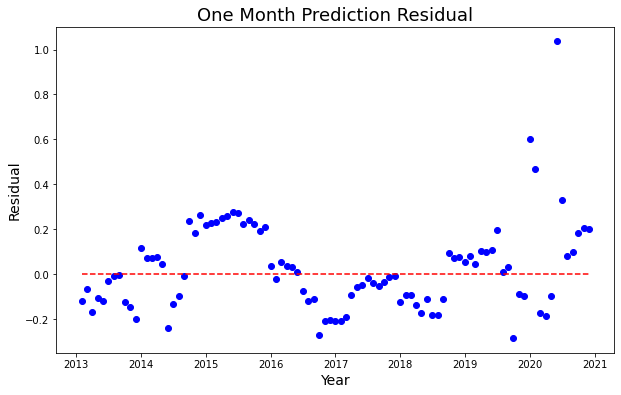

In [ ]:
plot_the_residual(m1,'One Month Prediction Residual')

0

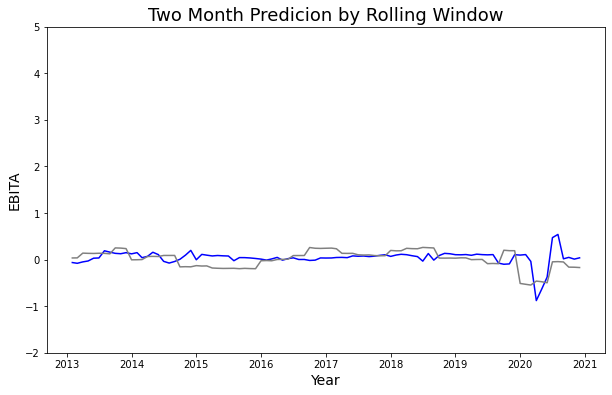

In [ ]:
plot_the_prediction(m2,'Two Month Predicion by Rolling Window')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0

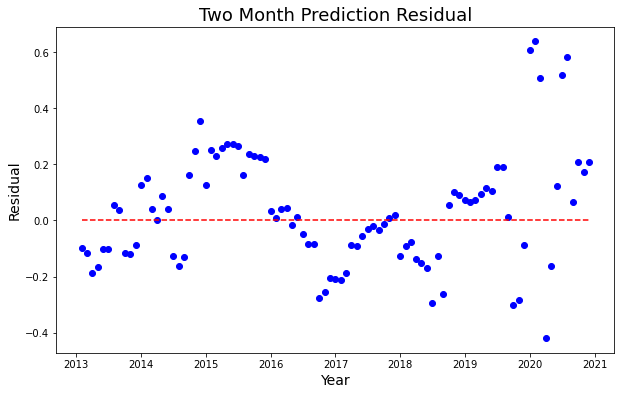

In [ ]:
plot_the_residual(m2,'Two Month Prediction Residual')

0

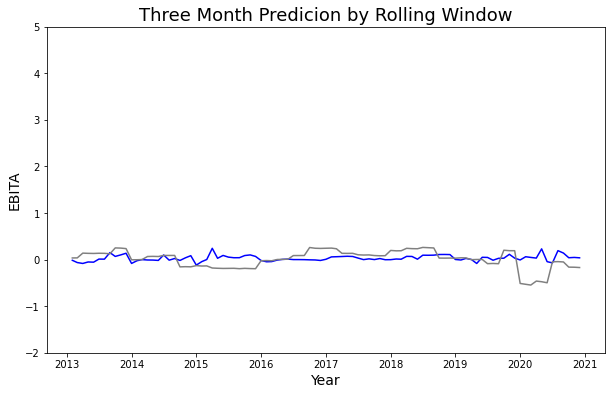

In [ ]:
plot_the_prediction(m3,'Three Month Predicion by Rolling Window')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0

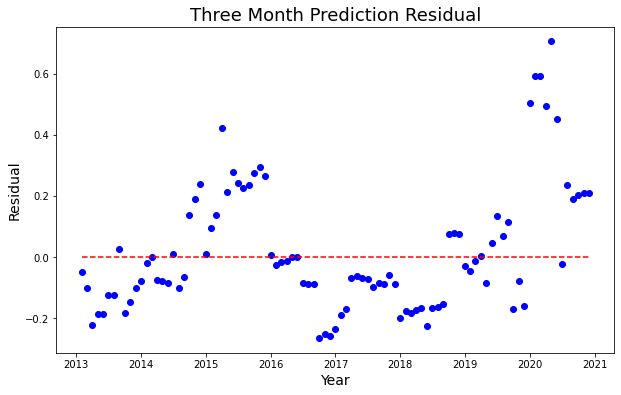

In [ ]:
plot_the_residual(m3,'Three Month Prediction Residual')

0

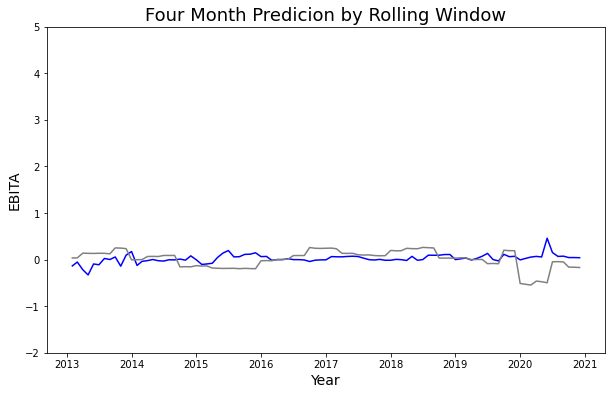

In [ ]:
plot_the_prediction(m4,'Four Month Predicion by Rolling Window')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0

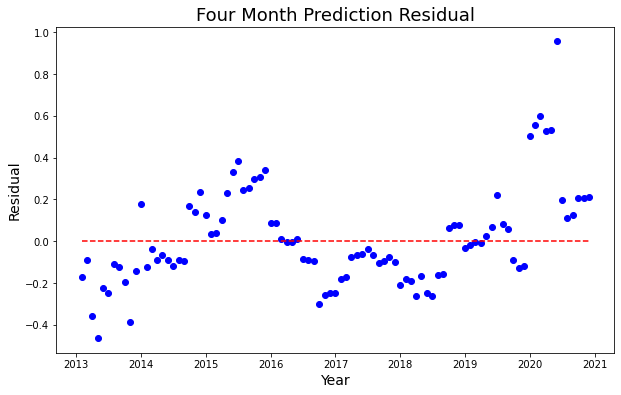

In [ ]:
plot_the_residual(m4,'Four Month Prediction Residual')

0

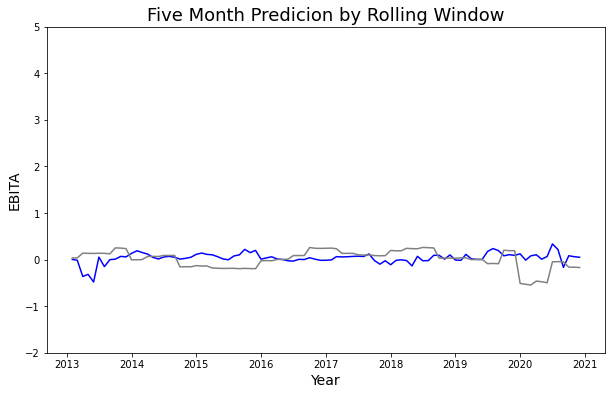

In [ ]:
plot_the_prediction(m5,'Five Month Predicion by Rolling Window')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0

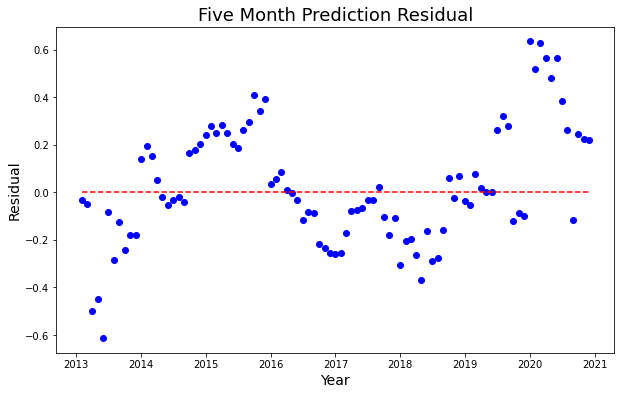

In [ ]:
plot_the_residual(m5,'Five Month Prediction Residual')

0

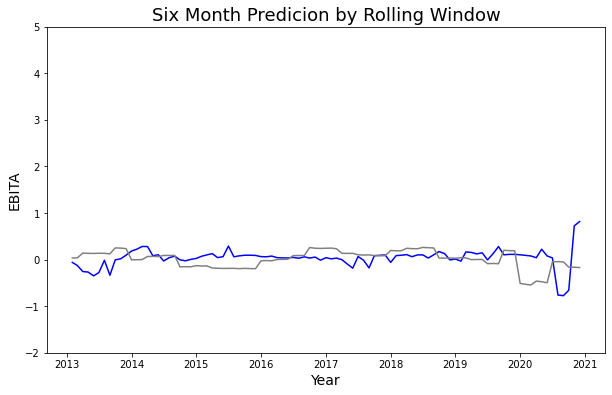

In [ ]:
plot_the_prediction(m6,'Six Month Predicion by Rolling Window')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0

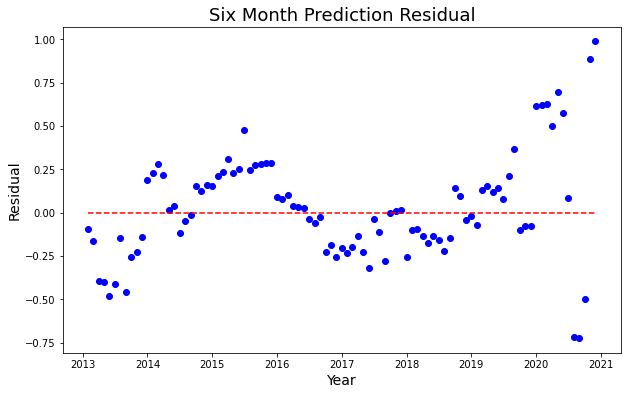

In [ ]:
plot_the_residual(m6,'Six Month Prediction Residual')

0

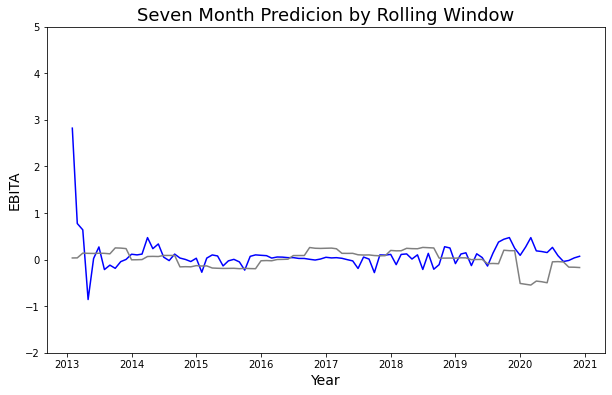

In [ ]:
plot_the_prediction(m7,'Seven Month Predicion by Rolling Window')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0

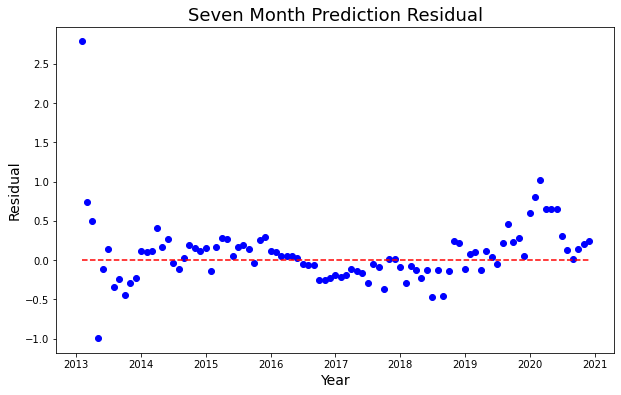

In [ ]:
plot_the_residual(m7,'Seven Month Prediction Residual')

0

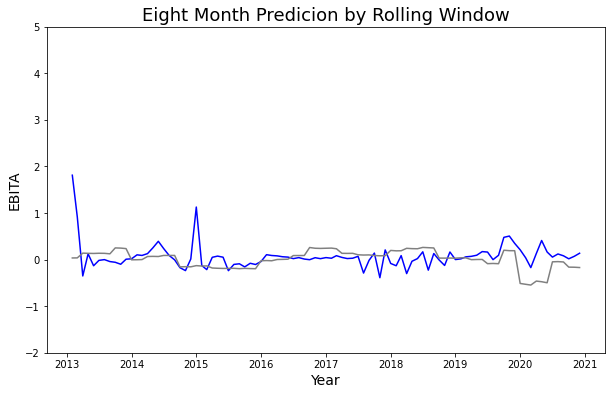

In [ ]:
plot_the_prediction(m8,'Eight Month Predicion by Rolling Window')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0

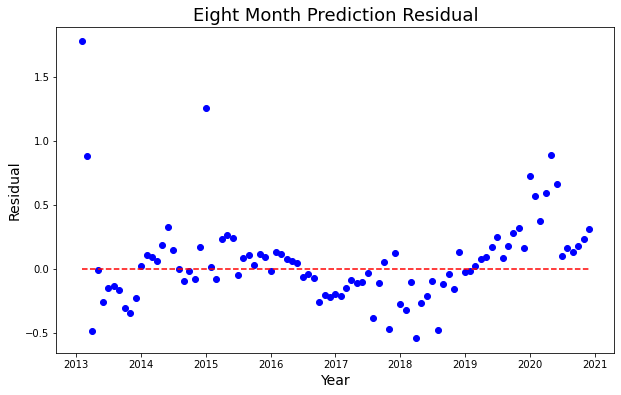

In [ ]:
plot_the_residual(m8,'Eight Month Prediction Residual')

0

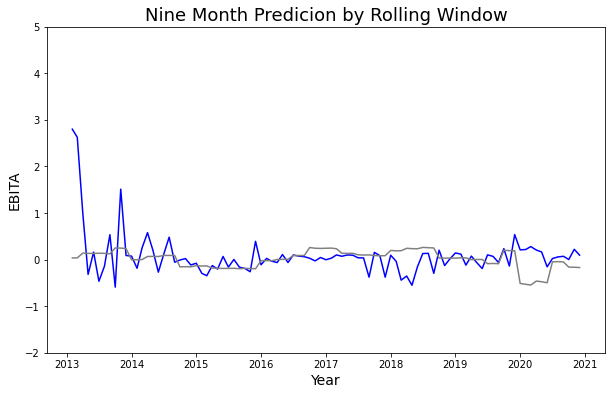

In [ ]:
plot_the_prediction(m9,'Nine Month Predicion by Rolling Window')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0

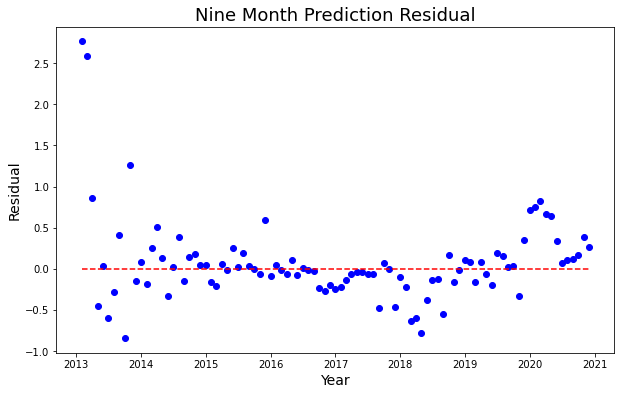

In [ ]:
plot_the_residual(m9,'Nine Month Prediction Residual')